dissertacao que explica SVm certinho
http://docs.computacao.ufcg.edu.br/posgraduacao/dissertacoes/2002/Dissertacao_EulandaMirandadosSantos.pdf

plots de cada kernel
https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

imagem de slack vars
https://www.google.com/search?q=svm+slack+variables&client=safari&rls=en&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi42uKgztv5AhW2uZUCHUOHAwIQ_AUoAXoECAEQAw&biw=1728&bih=1000&dpr=2#imgrc=wsCIUa1ZG6X9bM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
bankdata = pd.read_csv("../../datasets/svm/bill_authentication.csv")

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 

In [3]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
bankdata = pd.read_csv(path, names=col_names, sep=",", header=None)
bankdata.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bankdata.shape

(1372, 5)

In [5]:
bankdata['class'].unique()

array([0, 1])

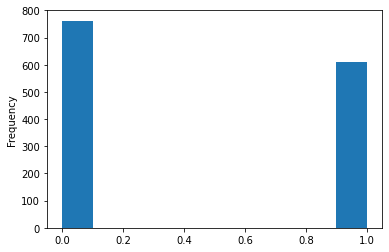

In [6]:
bankdata['class'].plot.hist();

In [7]:
bankdata['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
762-610

152

In [9]:
bankdata['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

In [10]:
bankdata['class'].value_counts(normalize=True)[0] - bankdata['class'].value_counts(normalize=True)[1]

0.11078717201166177

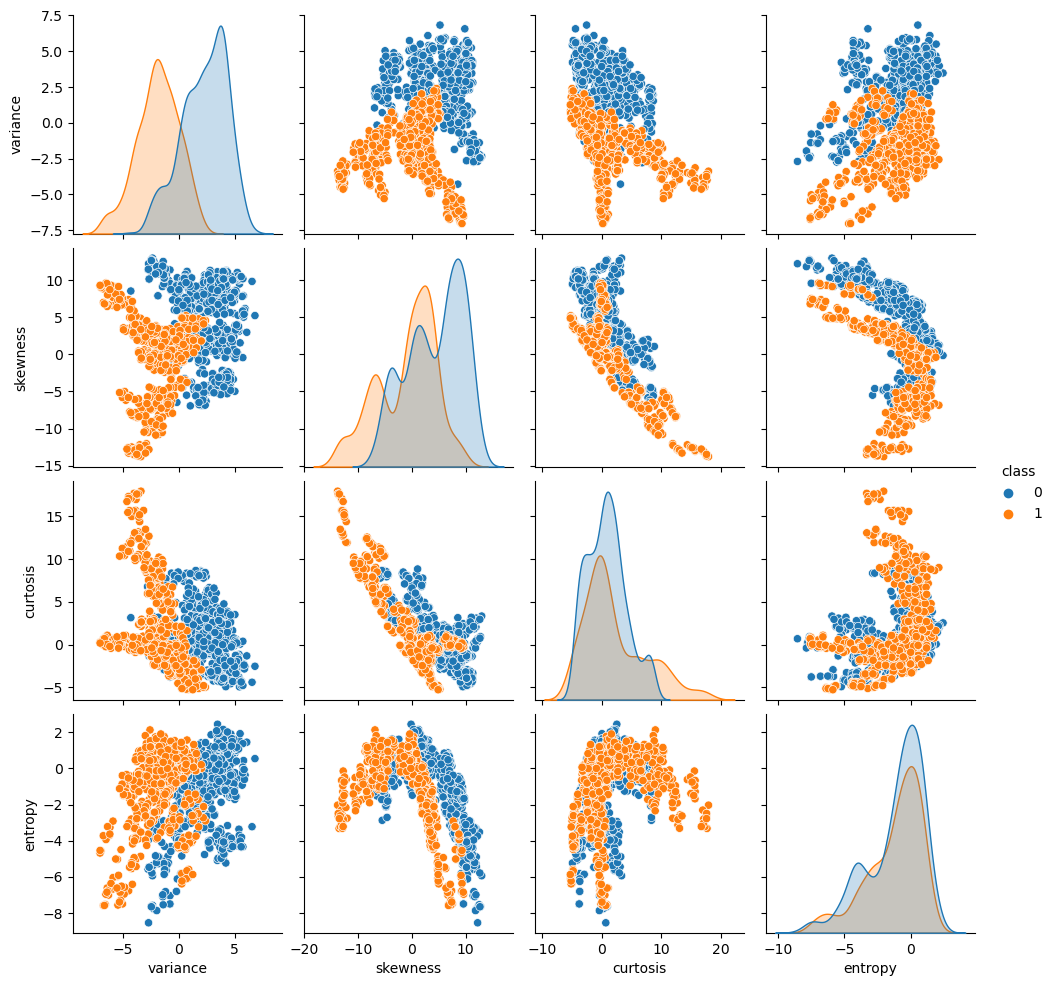

In [11]:
import seaborn as sns
sns.pairplot(bankdata, hue='class');

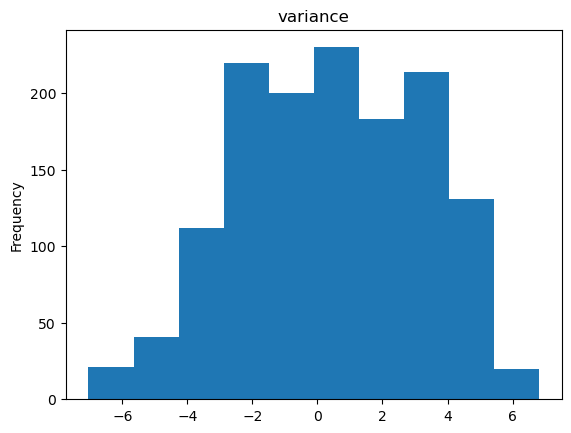

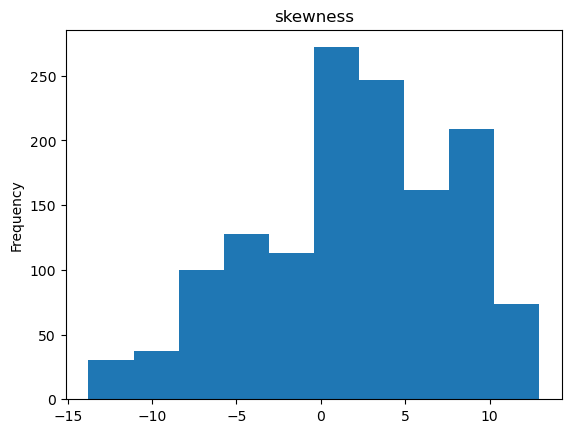

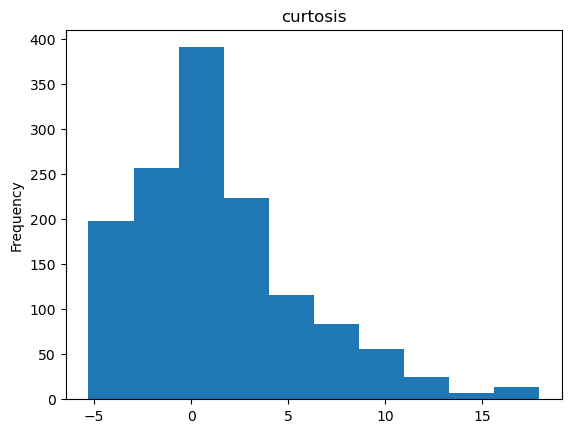

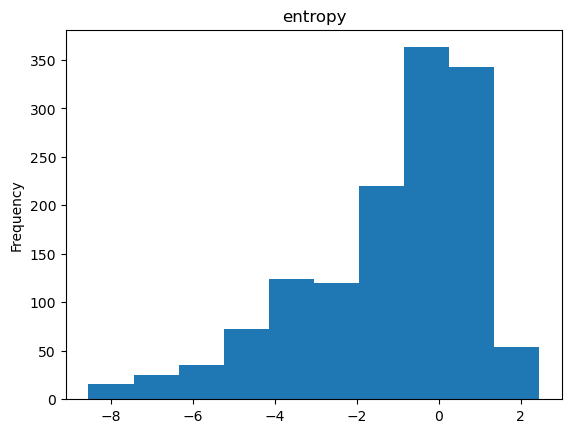

In [12]:
import matplotlib.pyplot as plt

for col in bankdata.columns[:-1]:
    plt.title(col)
    bankdata[col].plot.hist()
    plt.show();

In [13]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [14]:
bankdata.isna().count()

variance    1372
skewness    1372
curtosis    1372
entropy     1372
class       1372
dtype: int64

In [8]:
# for feat1 in bankdata.columns[:-1]:
#     for feat2 in bankdata.columns[:-1]:
#         if feat1 != feat2:
#             print(feat1, feat2)
#             sns.scatterplot(x=feat1, y=feat2, data=bankdata, hue='class')
#             plt.show();

In [9]:
X = bankdata.drop('class', axis=1)
y = bankdata['class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [11]:
type(X_train.shape)

tuple

In [12]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 1097 samples for training and 275 samples for testing.


In [13]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
svc_c = SVC(kernel='linear', C=0.0001)
svc_c.fit(X_train, y_train)

SVC(C=0.0001, kernel='linear')

In [16]:
svc_g = SVC(kernel='linear', gamma=0.00000001)
svc_g.fit(X_train, y_train)

SVC(gamma=1e-08, kernel='linear')

In [17]:
X.var() # variance

variance     8.081299
skewness    34.445710
curtosis    18.576359
entropy      4.414256
dtype: float64

In [18]:
X.shape[1]

4

In [19]:
#1/(X.shape[1]*np.array(X).var())

In [20]:
X_train.values

array([[-1.3885  , 12.5026  ,  0.69118 , -7.5487  ],
       [ 2.7744  ,  6.8576  , -1.0671  ,  0.075416],
       [-4.2887  , -7.8633  , 11.8387  , -1.8978  ],
       ...,
       [-7.0364  ,  9.2931  ,  0.16594 , -4.5396  ],
       [-3.4605  ,  2.6901  ,  0.16165 , -1.0224  ],
       [-3.3582  , -7.2404  , 11.4419  , -0.57113 ]])

In [21]:
number_of_features =  X_train.shape[1] 
features_variance = X_train.values.var()
gamma = 1/(number_of_features * features_variance)
print('gamma:', gamma)

gamma: 0.013924748072859962


In [22]:
np.array(X_train).var()

17.953646176713434

In [23]:
1/(4*np.array(X_train).var())

0.013924748072859962

In [24]:
# 1 / (n_features * X.var())
svc._gamma

0.013924748072859962

In [25]:
svc_c = SVC(kernel='linear', C=0.0001)
svc_c.fit(X_train, y_train)

SVC(C=0.0001, kernel='linear')

In [26]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
y_pred = svc.predict(X_test)

In [28]:
y_pred_g = svc_g.predict(X_test)

In [29]:
y_pred_c = svc_c.predict(X_test)

In [30]:
y_pred_ct = svc_c.predict(X_train)

In [31]:
y_pred_t = svc.predict(X_train)

In [32]:
import seaborn as sns

In [33]:
607/155 #120

3.9161290322580644

In [34]:
490/120

4.083333333333333

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



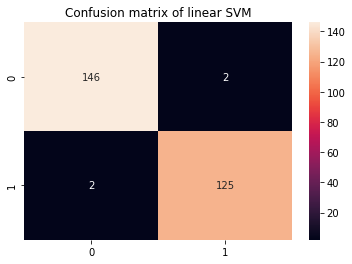

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
cmt = confusion_matrix(y_test,y_pred)
sns.heatmap(cmt, annot=True, fmt='d').set_title('Confusion matrix of linear SVM')

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



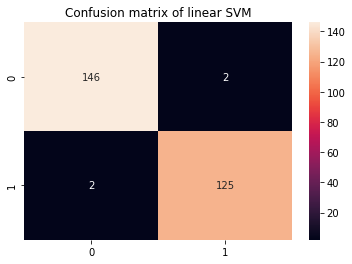

In [36]:
cm_g = confusion_matrix(y_test,y_pred_g)
sns.heatmap(cm_g, annot=True, fmt='d').set_title('Confusion matrix of linear SVM')

print(classification_report(y_test,y_pred_g))

In [39]:
# from sklearn.metrics import classification_report, confusion_matrix

# cmt1 = confusion_matrix(y_train,y_pred_t1)
# sns.heatmap(cmt1, annot=True, fmt='d')

# print(classification_report(y_train,y_pred_t1))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       148
           1       0.94      0.76      0.84       127

    accuracy                           0.87       275
   macro avg       0.88      0.86      0.86       275
weighted avg       0.88      0.87      0.86       275



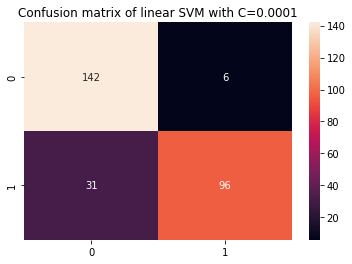

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

cm_c = confusion_matrix(y_test, y_pred_c)
sns.heatmap(cm_c, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with C=0.0001')

print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       614
           1       0.94      0.84      0.88       483

    accuracy                           0.90      1097
   macro avg       0.91      0.90      0.90      1097
weighted avg       0.91      0.90      0.90      1097



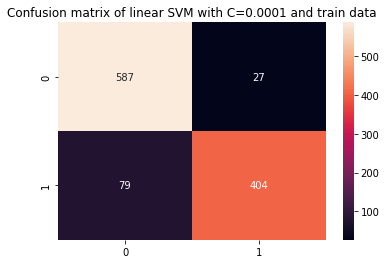

In [248]:
from sklearn.metrics import classification_report, confusion_matrix
cm_ct = confusion_matrix(y_train, y_pred_ct)
sns.heatmap(cm_ct, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with C=0.0001 and train data')

print(classification_report(y_train, y_pred_ct))

In [40]:
# svcC = SVC(kernel='linear', C=0.0001)
# svcC.fit(X_train, y_train)

In [41]:
# y_predC = svcC.predict(X_test)
# y_predCt = svcC.predict(X_train)

In [42]:
# cmtC = confusion_matrix(y_test,y_predC)
# sns.heatmap(cmtC, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with C=0.0001')

# print(classification_report(y_test,y_predC))

In [43]:
# cmtCt = confusion_matrix(y_train,y_predCt)
# sns.heatmap(cmtCt, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with C=0.0001')

# print(classification_report(y_train,y_predCt))

In [84]:
from sklearn.model_selection import GridSearchCV

parameters_dictionary = {'kernel':['linear', 'rbf'], 'C':[0.0001, 1, 10], 'gamma':[1, 10, 100]}
svc = SVC()
grid_search = GridSearchCV(svc, 
                           parameters_dictionary, 
                           scoring = 'f1',
                           return_train_score=True, 
                           cv=5,
                           verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 1, 10], 'gamma': [1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='f1', verbose=1)

In [81]:
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: SVC(C=1, gamma=1)
The best parameter values were: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
The best f1-score was: 0.9979166666666666


In [83]:
gs_mean_test_scores = grid_search.cv_results_['mean_test_score']
gs_mean_train_scores = grid_search.cv_results_['mean_train_score']
print("The mean test f1-scores were:", gs_mean_test_scores)
print("The mean train f1-scores were:", gs_mean_train_scores)

The mean test f1-scores were: [0.78017291 0.         0.78017291 0.         0.78017291 0.
 0.98865407 0.99791667 0.98865407 0.76553515 0.98865407 0.040291
 0.98656    0.99791667 0.98656    0.79182565 0.98656    0.09443985]
The mean train f1-scores were: [0.78443424 0.         0.78443424 0.         0.78443424 0.
 0.98762683 1.         0.98762683 1.         0.98762683 1.
 0.98942923 1.         0.98942923 1.         0.98942923 1.        ]


In [86]:
gs_mean_test_scores.mean(), gs_mean_train_scores.mean()

(0.664115883379838, 0.7935817168403057)

In [92]:
for test_score, train_score in (zip(gs_mean_test_scores, gs_mean_train_scores)):
    if test_score > train_score:
        print(test_score, train_score)

0.9886540703974145 0.9876268338202612
0.9886540703974145 0.9876268338202612
0.9886540703974145 0.9876268338202612


In [95]:
y_pred_best = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



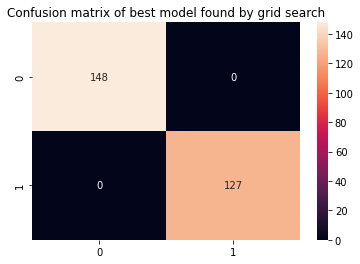

In [96]:
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d').set_title('Confusion matrix of best model found by grid search')

print(classification_report(y_test, y_pred_best))

In [97]:
y_pred_best_t = best_model.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



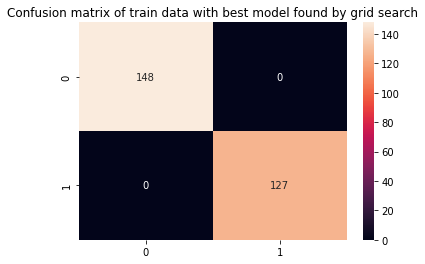

In [98]:
cm_best_t = confusion_matrix(y_train, y_pred_best_t)
sns.heatmap(cm_best, annot=True, fmt='d').set_title('Confusion matrix of train data with best model found by grid search')

print(classification_report(y_train, y_pred_best_t))

In [94]:
#pd.DataFrame(grid_search.cv_results_)

In [131]:
#svc.get_params()

In [62]:
# from sklearn.decomposition import PCA

In [63]:
# pca = PCA(n_components=2)
# pca.fit(X_train)

In [64]:
# pca.explained_variance_ratio_

In [65]:
# pcaXtrain = pca.transform(X_train)

In [66]:
# xx = pcaXtrain[:, 0]
# yy = pcaXtrain[:, 1]

In [67]:
# sns.scatterplot(x = xx, y= yy, hue=y_train);

In [138]:
#y_pred_t5 = svc

In [68]:
# svc5 = SVC(kernel='rbf', C=0.1, gamma=0.001)
# svc5.fit(X_train, y_pred_t)

In [77]:
# plt.scatter(xx, yy, c=y_pred_t, s=7)#, cmap='autumn')
# plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], s=7);

In [ ]:
plt.scatter(xx, yy, c=y_train, s=7)#, cmap='autumn')
plt.scatter(svc5.support_vectors_[:,0],svc5.support_vectors_[:,1], s=7);

In [141]:
y_pred_t5 = svc5.predict(X_train)

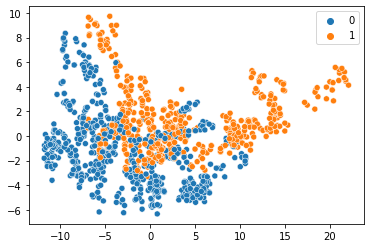

In [142]:
sns.scatterplot(x = xx, y= yy, hue=y_pred_t5);

In [143]:
y_pred5 = svc5.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



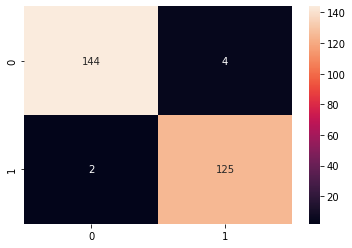

In [144]:
cm5 = confusion_matrix(y_test,y_pred5)
sns.heatmap(cm5, annot=True, fmt='d')

print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       614
           1       0.95      0.99      0.97       483

    accuracy                           0.97      1097
   macro avg       0.97      0.97      0.97      1097
weighted avg       0.97      0.97      0.97      1097



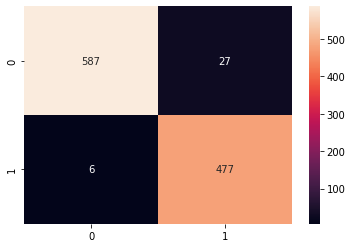

In [145]:
cmt5 = confusion_matrix(y_train,y_pred_t5)
sns.heatmap(cmt5, annot=True, fmt='d')

print(classification_report(y_train,y_pred_t5))

In [76]:
#svc.coef_

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



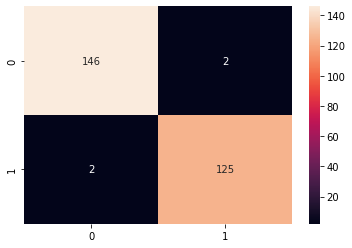

In [147]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_test,y_pred))

## Graficos e outros kernels

In [78]:
# plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, s=8)#, cmap='autumn')
# plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1]);

In [149]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [150]:
svc = SVC(kernel='linear')
svc.fit(X_train[['variance', 'skewness']], y_train)

SVC(kernel='linear')

/home/cassia/Projects/stack-abuse/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


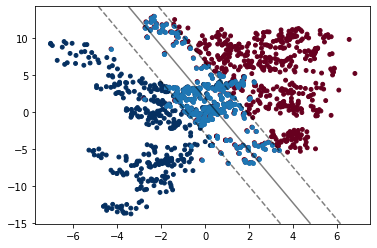

In [151]:
plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, s=15, cmap='RdBu')
plot_svc_decision_function(svc)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1], s=15);

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [153]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
svcs = SVC(kernel='linear')
svcs.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [155]:
y_preds = svcs.predict(X_test_scaled)
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[146   2]
 [  2 125]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [156]:
y_preds_train = svcs.predict(X_train_scaled)
print(confusion_matrix(y_train,y_preds_train))
print(classification_report(y_train,y_preds_train))

[[601  13]
 [  0 483]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       614
           1       0.97      1.00      0.99       483

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



In [157]:
a = pd.DataFrame(X_train_scaled, columns=col_names[:-1])

In [158]:
a.shape

(1097, 4)

In [159]:
b = pd.DataFrame(y_train).reset_index(drop=True)

In [160]:
ab = pd.concat([a, b], axis=1)

In [161]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1097.0,1.619286e-17,1.000456,-2.623389,-0.790142,0.022142,0.861759,2.243450
skewness,1097.0,1.295429e-17,1.000456,-2.631176,-0.645150,0.055408,0.824099,1.881395
curtosis,1097.0,-4.857858e-18,1.000456,-1.561866,-0.671562,-0.191727,0.436195,3.788794
entropy,1097.0,-5.991359e-17,1.000456,-3.530053,-0.558674,0.281154,0.757790,1.603845


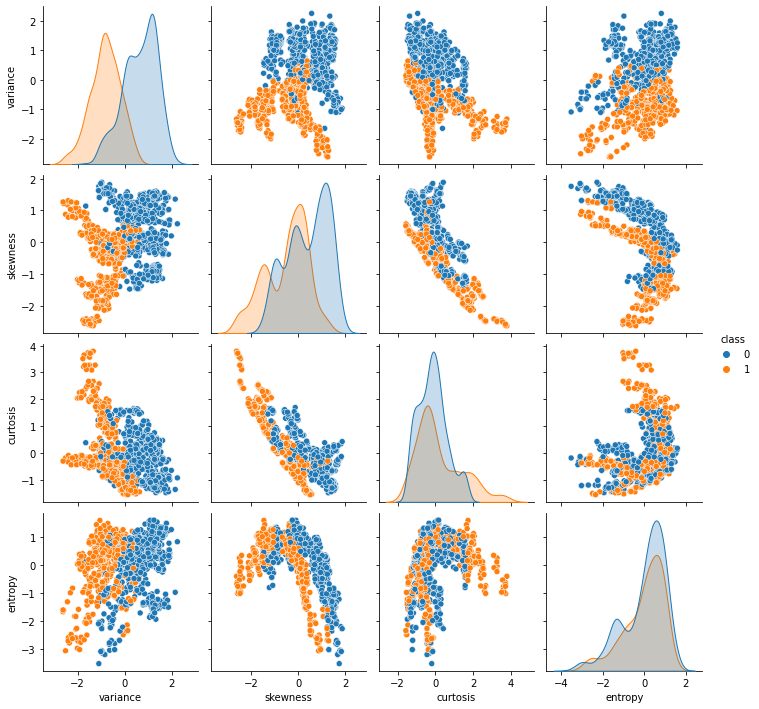

In [162]:
sns.pairplot(ab, hue="class");

In [163]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [164]:
svclassifier.support_vectors_

array([[ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [-7.86900e-01,  9.56630e+00, -3.78670e+00, -7.50340e+00],
       [-7.86900e-01,  9.56630e+00, -3.78670e+00, -7.50340e+00],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 3.79800e-01,  7.09800e-01,  7.57200e-01, -4.44400e-01],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 5.19470e-01, -3.26330e+00,  3.08950e+00, -9.84920e-01],
       [ 3.29200e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 3.79840e-01,  7.09750e-01,  7.57160e-01, -4.44410e-01],
       [-1.85840e+00,  7.88600e+00, -1.66430e+00, -1.83840e+00],
       [ 5.70600e-01, -2.48000e-02,  1.24210e+00, -5.62100e-01],
       [ 3.29240e-01, -4.45520e+00,  4.57180e+00, -9.88800e-01],
       [ 5.19500e-01, -3.26330e+00,  3.08950e+00, -9.84900e-01],
       [ 3.79800e-01,  7.

In [74]:
# plt.scatter(X_train['variance'], X_train['skewness'], c=y_train, s=8)#, cmap='autumn')
# plt.scatter(svclassifier.support_vectors_[:,0],svclassifier.support_vectors_[:,1]);

for plots: https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92
é uma copia descarada daqui: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [166]:
# ax = plt.gca()
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='autumn')

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)

# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = svclassifier.decision_function(xy).reshape(XX.shape)

# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])

# ax.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
# plt.show()

In [69]:
# y_pred = svclassifier.predict(X_test)

In [70]:
# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [71]:
# svclassifier2 = SVC(kernel='linear')
# svclassifier2.fit(X_train_scaled, y_train)

In [72]:
# y_pred2 = svclassifier2.predict(X_test_scaled)

In [73]:
# print(confusion_matrix(y_test,y_pred2))
# print(classification_report(y_test,y_pred2))

## Kernel svm

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# # Assign colum names to the dataset
# colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# # Read dataset to pandas dataframe
# irisdata = pd.read_csv(url, names=colnames)

In [174]:
# X = irisdata.drop('Class', axis=1)
# y = irisdata['Class']

In [175]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [99]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [100]:
y_pred = svclassifier.predict(X_test)
y_predt = svclassifier.predict(X_train)

In [105]:
def display_results(y_test, y_pred, cm_title):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title(cm_title)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81       148
           1       1.00      0.46      0.63       127

    accuracy                           0.75       275
   macro avg       0.84      0.73      0.72       275
weighted avg       0.83      0.75      0.73       275



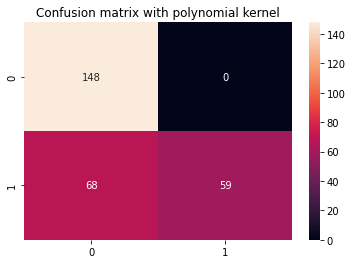

In [108]:
cm_title_poly = "Confusion matrix with polynomial kernel"
display_results(y_test, y_pred, cm_title_poly)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[148   0]
 [ 68  59]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       148
           1       1.00      0.46      0.63       127

    accuracy                           0.75       275
   macro avg       0.84      0.73      0.72       275
weighted avg       0.83      0.75      0.73       275



In [179]:
print(confusion_matrix(y_train, y_predt))
print(classification_report(y_train, y_predt))

[[614   0]
 [249 234]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       614
           1       1.00      0.48      0.65       483

    accuracy                           0.77      1097
   macro avg       0.86      0.74      0.74      1097
weighted avg       0.84      0.77      0.75      1097



In [180]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [181]:
y_pred = svclassifier.predict(X_test)

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[148   0]
 [  0 127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [183]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [184]:
y_pred = svclassifier.predict(X_test)

In [185]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105  43]
 [ 52  75]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       148
           1       0.64      0.59      0.61       127

    accuracy                           0.65       275
   macro avg       0.65      0.65      0.65       275
weighted avg       0.65      0.65      0.65       275



$ g(x) = \vec{w}\cdot\vec{x} + w_0 $

$ \vec{w}\cdot\vec{x} + w_0 = 0$

$ \vec{w}\cdot\vec{x} + w_0 = 0$